In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Leemos el dataset y valores perdidos "?"
### Elimino columnas Unnamed y numeros de serie

In [2]:
na_values = ["?"]
datos = pd.read_csv("X:/Documentos/Formacion/MBIG/ProjectoJamones/cerditos.csv", encoding = "utf-8", na_values= na_values)
pd.options.display.max_columns = None
datos.head(10)
datos.drop(columns=['Unnamed: 0','NumeroSerieLc'], axis=1, inplace=True)
datos

,TipoArticuloEscandallo,Añada,Partida,Raza,Alimentacion,AcidoOleico,AcidoPalmitico,AcidoEstearico,AcidoLinoleico,PesoVarios,Pesovientres,PesoCerdos,PesoNetoCanal,Nacimiento,CodigoMatadero,NroAnimales,PesoEntradaEntrada,TipoPesada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida
0,Paleta,2014,577,IBERICO,BELLOTA,54.16,20.66,10.34,8.39,5647.580,10371.0,13266.75,10163.580,"10/05/2011, 20/08/12",1,75,8.300000,Grupal,5.033,PALETA IB.BELLOTA,2014-02-13 00:00:00.000,2015-09-29 00:00:00.000
1,Paleta,2014,932,IBERICO,BELLOTA,54.33,19.68,9.35,10.30,5907.688,10945.6,12869.02,10726.688,04/03/2012,1,74,8.885135,Grupal,2.324,PALETA IB. BELLOTA DESH.,2014-03-13 00:00:00.000,2015-10-28 00:00:00.000
2,Paleta,2014,932,IBERICO,BELLOTA,54.33,19.68,9.35,10.30,5907.688,10945.6,12869.02,10726.688,04/03/2012,1,74,8.885135,Grupal,2.612,PALETA IB. BELLOTA DESH.,2014-03-13 00:00:00.000,2015-10-28 00:00:00.000
3,Paleta,2014,774,IBERICO,BELLOTA,55.41,19.44,8.60,10.28,10561.690,19240.5,23240.00,18855.690,04/09/2012,1,120,9.433333,Grupal,2.544,PALETA IB. BELLOTA DESH.,2014-02-26 00:00:00.000,2015-11-09 00:00:00.000
4,Paleta,2014,540,IBERICO,BELLOTA,54.83,20.70,9.77,8.02,10179.084,18243.8,22010.00,17878.924,05/11/2012,1,130,7.992308,Grupal,2.544,PALETA IB. BELLOTA DESH.,2014-02-11 00:00:00.000,2015-11-09 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Paleta,2014,933,IBERICO,BELLOTA,53.70,20.84,10.13,8.80,3301.702,6009.9,7110.97,5889.702,20/08/2012,1,39,9.076923,Grupal,3.016,PALETA DE BELLOTA IB. D.O. DESH.,2014-03-13 00:00:00.000,2016-11-14 00:00:00.000
19996,Paleta,2014,933,IBERICO,BELLOTA,53.70,20.84,10.13,8.80,3301.702,6009.9,7110.97,5889.702,20/08/2012,1,39,9.076923,Grupal,2.800,PALETA IB. BELLOTA DESH.,2014-03-13 00:00:00.000,2015-11-27 00:00:00.000
19997,Jamón,2015,64,75% IBERICO,BELLOTA,50.20,23.04,12.26,8.08,8640.048,15427.6,18790.00,15119.048,10/05/2013,1,103,13.393204,Grupal,7.477,JAMON DE BELLOTA IBÉRICO D.O.,2015-01-07 00:00:00.000,2018-10-31 00:00:00.000
19998,Jamón,2015,64,75% IBERICO,BELLOTA,50.20,23.04,12.26,8.08,8640.048,15427.6,18790.00,15119.048,10/05/2013,1,103,13.393204,Grupal,7.765,JAMON DE BELLOTA IBÉRICO D.O.,2015-01-07 00:00:00.000,2017-12-19 00:00:00.000


### Dimensiones de conjunto de Datos

In [3]:
print("Dimension dataset:", (datos.shape))
print()
datos.info()

Dimension dataset: (20000, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TipoArticuloEscandallo  20000 non-null  object 
 1   Añada                   20000 non-null  int64  
 2   Partida                 20000 non-null  int64  
 3   Raza                    20000 non-null  object 
 4   Alimentacion            20000 non-null  object 
 5   AcidoOleico             20000 non-null  float64
 6   AcidoPalmitico          20000 non-null  float64
 7   AcidoEstearico          20000 non-null  float64
 8   AcidoLinoleico          20000 non-null  float64
 9   PesoVarios              20000 non-null  float64
 10  Pesovientres            20000 non-null  float64
 11  PesoCerdos              20000 non-null  float64
 12  PesoNetoCanal           20000 non-null  float64
 13  Nacimiento              18174 non-null  object 
 14  Codigo

### Reviso valores null


In [4]:
sns.set(rc ={"figure.figsize":(15,8)})

print(datos.isna().sum().sum())
print(datos.isnull().sum().sum())
print(datos.isna().sum())

2055
2055
TipoArticuloEscandallo       0
Añada                        0
Partida                      0
Raza                         0
Alimentacion                 0
AcidoOleico                  0
AcidoPalmitico               0
AcidoEstearico               0
AcidoLinoleico               0
PesoVarios                   0
Pesovientres                 0
PesoCerdos                   0
PesoNetoCanal                0
Nacimiento                1826
CodigoMatadero               0
NroAnimales                  0
PesoEntradaEntrada           0
TipoPesada                   0
PesoSalida                 229
DescripcionArticulo          0
FechaEntrada                 0
FechaSalida                  0
dtype: int64


<AxesSubplot:>

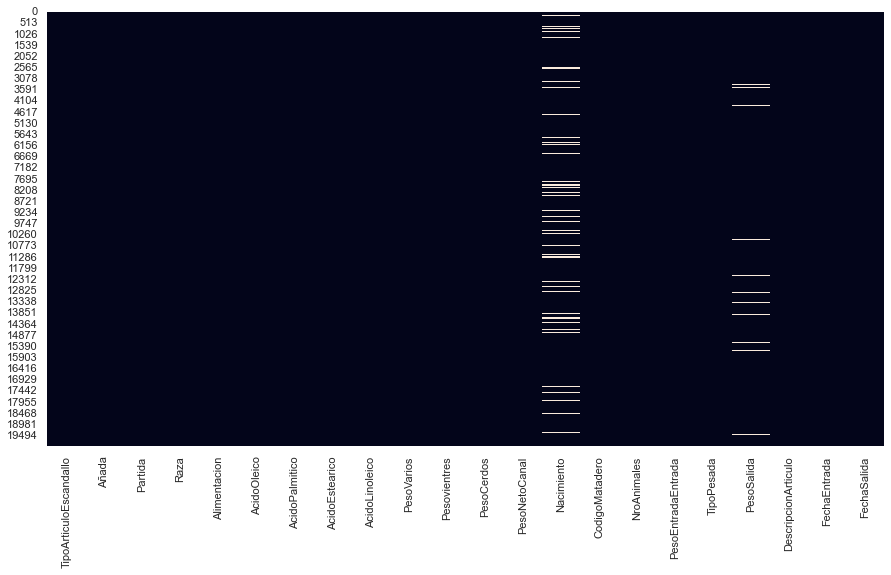

In [5]:
sns.heatmap(datos.isnull(),cbar=False)

# Elimino Fechas dobles y datos faltantes 

### elimino horas de fechas de entrada y salida

In [6]:
datos = datos.drop(datos[datos['Nacimiento'].str.len()>10].index)
datos = datos.drop(datos[datos['Nacimiento'].isna()].index)
datos = datos.drop(datos[datos['PesoSalida'].isna()].index)

In [7]:
datos.shape

(17209, 22)

### Reviso Duplicados

In [8]:
print(datos.duplicated().sum().sum())
dups = datos.duplicated()
# Miramos si hay duplicados
print('Algun duplicado? {}'.format(dups.any()))
print()
print('Registros duplicados: \n{}'.format(datos[dups]))
print()


6689
Algun duplicado? True

Registros duplicados: 
      TipoArticuloEscandallo  Añada  Partida          Raza Alimentacion  \
37                    Paleta   2014     1025       IBERICO      BELLOTA   
41                    Paleta   2014     1025       IBERICO      BELLOTA   
42                    Paleta   2014     1025       IBERICO      BELLOTA   
43                    Paleta   2014     1025       IBERICO      BELLOTA   
47                    Paleta   2014      207  IBERICO PURO      BELLOTA   
...                      ...    ...      ...           ...          ...   
19992                  Jamón   2015      472   75% IBERICO      BELLOTA   
19993                  Jamón   2014      774       IBERICO      BELLOTA   
19995                 Paleta   2014      933       IBERICO      BELLOTA   
19997                  Jamón   2015       64   75% IBERICO      BELLOTA   
19998                  Jamón   2015       64   75% IBERICO      BELLOTA   

       AcidoOleico  AcidoPalmitico  AcidoEsteari

### Datos unicos por columna

In [9]:
counts = datos.nunique()
counts

TipoArticuloEscandallo       2
Añada                        6
Partida                     84
Raza                         5
Alimentacion                 2
AcidoOleico                 73
AcidoPalmitico              75
AcidoEstearico              68
AcidoLinoleico              75
PesoVarios                  85
Pesovientres                85
PesoCerdos                  84
PesoNetoCanal               85
Nacimiento                  49
CodigoMatadero               1
NroAnimales                 53
PesoEntradaEntrada         163
TipoPesada                   2
PesoSalida                1503
DescripcionArticulo        132
FechaEntrada                57
FechaSalida                957
dtype: int64

### Corregimos Valores duplicados o iguales con distinto nombre

In [10]:
datos['Raza'] = datos['Raza'].replace(datos[datos['Raza'].str.len()>10].index)

datos['Raza'].replace(to_replace={'IBERICO': '50% IBERICO', 'IBERICO PURO': '100% IBERICO'}, inplace=True)
datos['Raza'].unique()

array(['50% IBERICO', '100% IBERICO', '75% IBERICO'], dtype=object)

# Formatos de fechas y creamos el target1: tiempo de maduración

In [11]:
datos['FechaEntrada'] =  pd.to_datetime(datos['FechaEntrada'])
datos['FechaSalida'] =  pd.to_datetime(datos['FechaSalida'])
datos['Nacimiento'] =  pd.to_datetime(datos['Nacimiento'])

### Añadimos variable Edad de sacrificio

In [12]:
# PASO 5 CREAMOS COLUMNA EdadSacrificio CON FECHAS DE NACIMIENTO Y ENTRADA DE LA PIEZA

# EdadSacrificio EN DÍAS
datos['EdadSacrificio']= datos['FechaEntrada'] - datos['Nacimiento']
datos['EdadSacrificio']=datos['EdadSacrificio'].dt.days.astype(int)
datos['EdadSacrificio']



1        709
2        709
3        688
4        641
5        908
        ... 
19995    570
19996    570
19997    459
19998    459
19999    519
Name: EdadSacrificio, Length: 17209, dtype: int32

In [13]:
# EdadSacrificioMESES EN MESES
datos["EdadSacrificio_MESES"]=round(((datos['FechaEntrada'] - datos['Nacimiento']).dt.days)/30.41).astype(int)
datos["EdadSacrificio_MESES"]

1        23
2        23
3        23
4        21
5        30
         ..
19995    19
19996    19
19997    15
19998    15
19999    17
Name: EdadSacrificio_MESES, Length: 17209, dtype: int32

## Target1: T_Maduracion

In [14]:
from datetime import datetime as dt

datos["T_Maduracion"]= (datos['FechaSalida']-datos['FechaEntrada'])
datos["T_Maduracion"]= datos['T_Maduracion'].dt.days.astype(int)
datos["T_Maduracion"]



1         594
2         594
3         621
4         636
5         636
         ... 
19995     977
19996     624
19997    1393
19998    1077
19999    1488
Name: T_Maduracion, Length: 17209, dtype: int32

In [15]:
# TiempoMaduracionMESES EN MESES
datos["T_Maduracion_MESES"]=round(((datos['FechaSalida']-datos['FechaEntrada']).dt.days)/30.41).astype(int)
datos["T_Maduracion_MESES"]

1        20
2        20
3        20
4        21
5        21
         ..
19995    32
19996    21
19997    46
19998    35
19999    49
Name: T_Maduracion_MESES, Length: 17209, dtype: int32

In [16]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17209 entries, 1 to 19999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TipoArticuloEscandallo  17209 non-null  object        
 1   Añada                   17209 non-null  int64         
 2   Partida                 17209 non-null  int64         
 3   Raza                    17209 non-null  object        
 4   Alimentacion            17209 non-null  object        
 5   AcidoOleico             17209 non-null  float64       
 6   AcidoPalmitico          17209 non-null  float64       
 7   AcidoEstearico          17209 non-null  float64       
 8   AcidoLinoleico          17209 non-null  float64       
 9   PesoVarios              17209 non-null  float64       
 10  Pesovientres            17209 non-null  float64       
 11  PesoCerdos              17209 non-null  float64       
 12  PesoNetoCanal           17209 non-null  float6

In [17]:
datos.describe()

,Añada,Partida,AcidoOleico,AcidoPalmitico,AcidoEstearico,AcidoLinoleico,PesoVarios,Pesovientres,PesoCerdos,PesoNetoCanal,CodigoMatadero,NroAnimales,PesoEntradaEntrada,PesoSalida,EdadSacrificio,EdadSacrificio_MESES,T_Maduracion,T_Maduracion_MESES
count,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.0,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000
mean,2014.881632,1818.192980,54.640898,20.309672,9.484906,9.198028,7789.674212,14391.304701,17559.280918,14103.478606,1.0,96.123482,10.996884,10.132574,591.525888,19.412168,1171.650474,38.523912
std,0.900239,15072.466598,1.398374,0.837462,0.886162,0.972483,2679.058945,5028.972379,6170.019154,4928.392931,0.0,37.901096,2.531003,171.906302,133.676351,4.467517,339.159605,11.152134
min,2014.000000,64.000000,50.200000,18.550000,7.550000,5.700000,701.246000,1172.700000,1360.720000,1149.246000,1.0,0.000000,6.325833,0.000000,-272.000000,-9.000000,45.000000,1.000000
25%,2014.000000,375.000000,53.800000,19.630000,8.900000,8.430000,6393.206000,11232.000000,13456.000000,11007.360000,1.0,70.000000,8.514286,3.152000,480.000000,16.000000,893.000000,29.000000
50%,2015.000000,722.000000,54.700000,20.310000,9.500000,9.150000,8640.048000,16286.200000,20020.000000,15960.476000,1.0,106.000000,11.357692,6.000000,603.000000,20.000000,1086.000000,36.000000
75%,2015.000000,961.000000,55.680000,20.740000,10.000000,9.870000,9713.136000,18353.200000,22800.000000,17986.136000,1.0,130.000000,13.200000,8.515000,713.000000,23.000000,1395.000000,46.000000
max,2021.000000,211075.000000,59.060000,23.040000,12.400000,12.010000,11997.620000,20859.000000,25160.000000,20441.820000,1.0,140.000000,17.150000,7524.000000,908.000000,30.000000,2608.000000,86.000000


<AxesSubplot:>

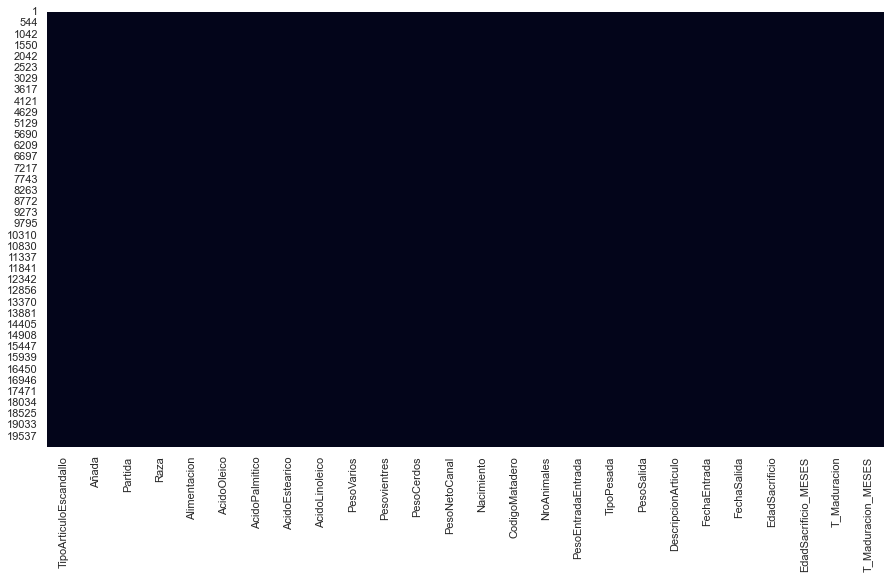

In [18]:
sns.heatmap(datos.isnull(),cbar=False)

### Eliminamos variables que no tienen sentido par a el estudio
#### los acidos he visto que la correlación con el Tiempo de maduración es casi 0

In [19]:
eliminar = ["AcidoOleico","AcidoPalmitico","AcidoEstearico","AcidoLinoleico","Nacimiento","FechaEntrada","FechaSalida","PesoVarios","Pesovientres","PesoCerdos","PesoNetoCanal","CodigoMatadero","TipoPesada"]
for columnas in eliminar:
    datos.drop(columnas, axis=1, inplace=True)

In [20]:
datos

,TipoArticuloEscandallo,Añada,Partida,Raza,Alimentacion,NroAnimales,PesoEntradaEntrada,PesoSalida,DescripcionArticulo,EdadSacrificio,EdadSacrificio_MESES,T_Maduracion,T_Maduracion_MESES
1,Paleta,2014,932,50% IBERICO,BELLOTA,74,8.885135,2.324,PALETA IB. BELLOTA DESH.,709,23,594,20
2,Paleta,2014,932,50% IBERICO,BELLOTA,74,8.885135,2.612,PALETA IB. BELLOTA DESH.,709,23,594,20
3,Paleta,2014,774,50% IBERICO,BELLOTA,120,9.433333,2.544,PALETA IB. BELLOTA DESH.,688,23,621,20
4,Paleta,2014,540,50% IBERICO,BELLOTA,130,7.992308,2.544,PALETA IB. BELLOTA DESH.,641,21,636,21
5,Paleta,2014,579,50% IBERICO,BELLOTA,25,8.400000,2.696,PALETA IB.BELLOTA D.O. DESH.,908,30,636,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Paleta,2014,933,50% IBERICO,BELLOTA,39,9.076923,3.016,PALETA DE BELLOTA IB. D.O. DESH.,570,19,977,32
19996,Paleta,2014,933,50% IBERICO,BELLOTA,39,9.076923,2.800,PALETA IB. BELLOTA DESH.,570,19,624,21
19997,Jamón,2015,64,75% IBERICO,BELLOTA,103,13.393204,7.477,JAMON DE BELLOTA IBÉRICO D.O.,459,15,1393,46
19998,Jamón,2015,64,75% IBERICO,BELLOTA,103,13.393204,7.765,JAMON DE BELLOTA IBÉRICO D.O.,459,15,1077,35


### Detección de Outliers

### ONE HOT ENCODER- codificación variables categóricas

In [21]:
# PASO 7 ONE_HOT_ENCODER A VARIABLES CON MENOS DE 10 CLASES

#VAMOS A HACER CREAR UN DATASET ONE_HOT_ENCODER APLICANDO EL ONE_HOT A TODAS LAS CATEGORÍAS QUE 
#TENGAN MENOS DE 11 CATEGORÍAS
datos_cod = datos.copy()


#Lista de número de categorías distintas del dataSet original
uvs = datos.nunique().tolist()

#Apuntaré en las siguientes dos listas los índices de las columnas de tengan menos y mas/igual de 11 categorías
ncol = []
ncolinv = []
#Con el bucle relleno ambas listas
c = 0
for i in uvs:
    if i<=10:
        ncol.append(c)
    else:
        ncolinv.append(c)
    c+=1

#DataSet con variables de menos de 11 categorías
datos_codA=datos_cod.iloc[:,ncol]

#DataSet con variables de mas de 10 categorías
datos_codB=datos_cod.iloc[:,ncolinv]
    
#Defino el ONE_HOT_ENCODER casero que hemos fabricado para no cargarnos el dataframe
def createDummies(df, var_name):
    dummy =pd.get_dummies(df[var_name])
    df=df.drop(var_name,axis=1)
    df=pd.concat([df,dummy],axis=1)
    return(df)
    
#Debido a que esta pensado para usarse con objects o strings hago la transformación pertinente
listcol = datos_codA.columns.tolist()
datos_codA = datos_codA.astype(str)

#Aplico el ONE_HOT_ENCODER casero al dataSet de menos de 11 categorías
datos_codA = createDummies(datos_codA, listcol)

#Concateno el dataSet que tiene variables con mas de 11 categorías
datos_OneH = pd.concat([datos_codA,datos_codB], axis = 1)
    

datos_OneH

,TipoArticuloEscandallo_Jamón,TipoArticuloEscandallo_Paleta,Añada_2014,Añada_2015,Añada_2016,Añada_2018,Añada_2020,Añada_2021,Raza_100% IBERICO,Raza_50% IBERICO,Raza_75% IBERICO,Alimentacion_BELLOTA,Alimentacion_CEBO DE CAMPO,Partida,NroAnimales,PesoEntradaEntrada,PesoSalida,DescripcionArticulo,EdadSacrificio,EdadSacrificio_MESES,T_Maduracion,T_Maduracion_MESES
1,0,1,1,0,0,0,0,0,0,1,0,1,0,932,74,8.885135,2.324,PALETA IB. BELLOTA DESH.,709,23,594,20
2,0,1,1,0,0,0,0,0,0,1,0,1,0,932,74,8.885135,2.612,PALETA IB. BELLOTA DESH.,709,23,594,20
3,0,1,1,0,0,0,0,0,0,1,0,1,0,774,120,9.433333,2.544,PALETA IB. BELLOTA DESH.,688,23,621,20
4,0,1,1,0,0,0,0,0,0,1,0,1,0,540,130,7.992308,2.544,PALETA IB. BELLOTA DESH.,641,21,636,21
5,0,1,1,0,0,0,0,0,0,1,0,1,0,579,25,8.400000,2.696,PALETA IB.BELLOTA D.O. DESH.,908,30,636,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,1,0,0,0,0,0,0,1,0,1,0,933,39,9.076923,3.016,PALETA DE BELLOTA IB. D.O. DESH.,570,19,977,32
19996,0,1,1,0,0,0,0,0,0,1,0,1,0,933,39,9.076923,2.800,PALETA IB. BELLOTA DESH.,570,19,624,21
19997,1,0,0,1,0,0,0,0,0,0,1,1,0,64,103,13.393204,7.477,JAMON DE BELLOTA IBÉRICO D.O.,459,15,1393,46
19998,1,0,0,1,0,0,0,0,0,0,1,1,0,64,103,13.393204,7.765,JAMON DE BELLOTA IBÉRICO D.O.,459,15,1077,35


In [22]:
from sklearn.preprocessing import OrdinalEncoder

# PASO 9 CODIFICAMOS CON ORDINAL ENCODER
codificar = ["DescripcionArticulo"]
for columnas in codificar:
    oe = OrdinalEncoder()
    datos_OneH[columnas] = oe.fit_transform(datos_OneH[[columnas]])

In [23]:
datos_OneH

,TipoArticuloEscandallo_Jamón,TipoArticuloEscandallo_Paleta,Añada_2014,Añada_2015,Añada_2016,Añada_2018,Añada_2020,Añada_2021,Raza_100% IBERICO,Raza_50% IBERICO,Raza_75% IBERICO,Alimentacion_BELLOTA,Alimentacion_CEBO DE CAMPO,Partida,NroAnimales,PesoEntradaEntrada,PesoSalida,DescripcionArticulo,EdadSacrificio,EdadSacrificio_MESES,T_Maduracion,T_Maduracion_MESES
1,0,1,1,0,0,0,0,0,0,1,0,1,0,932,74,8.885135,2.324,66.0,709,23,594,20
2,0,1,1,0,0,0,0,0,0,1,0,1,0,932,74,8.885135,2.612,66.0,709,23,594,20
3,0,1,1,0,0,0,0,0,0,1,0,1,0,774,120,9.433333,2.544,66.0,688,23,621,20
4,0,1,1,0,0,0,0,0,0,1,0,1,0,540,130,7.992308,2.544,66.0,641,21,636,21
5,0,1,1,0,0,0,0,0,0,1,0,1,0,579,25,8.400000,2.696,124.0,908,30,636,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,1,0,0,0,0,0,0,1,0,1,0,933,39,9.076923,3.016,91.0,570,19,977,32
19996,0,1,1,0,0,0,0,0,0,1,0,1,0,933,39,9.076923,2.800,66.0,570,19,624,21
19997,1,0,0,1,0,0,0,0,0,0,1,1,0,64,103,13.393204,7.477,21.0,459,15,1393,46
19998,1,0,0,1,0,0,0,0,0,0,1,1,0,64,103,13.393204,7.765,21.0,459,15,1077,35


#### Estudio de Correlaciones

In [24]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos_OneH.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(15)

,variable_1,variable_2,r,abs_r
79,T_Maduracion_MESES,T_Maduracion,0.999659,0.999659
71,T_Maduracion,T_Maduracion_MESES,0.999659,0.999659
51,EdadSacrificio,EdadSacrificio_MESES,0.997695,0.997695
59,EdadSacrificio_MESES,EdadSacrificio,0.997695,0.997695
38,DescripcionArticulo,PesoEntradaEntrada,-0.800952,0.800952
22,PesoEntradaEntrada,DescripcionArticulo,-0.800952,0.800952
25,PesoEntradaEntrada,T_Maduracion,0.711571,0.711571
65,T_Maduracion,PesoEntradaEntrada,0.711571,0.711571
74,T_Maduracion_MESES,PesoEntradaEntrada,0.711150,0.711150
26,PesoEntradaEntrada,T_Maduracion_MESES,0.711150,0.711150


<AxesSubplot:>

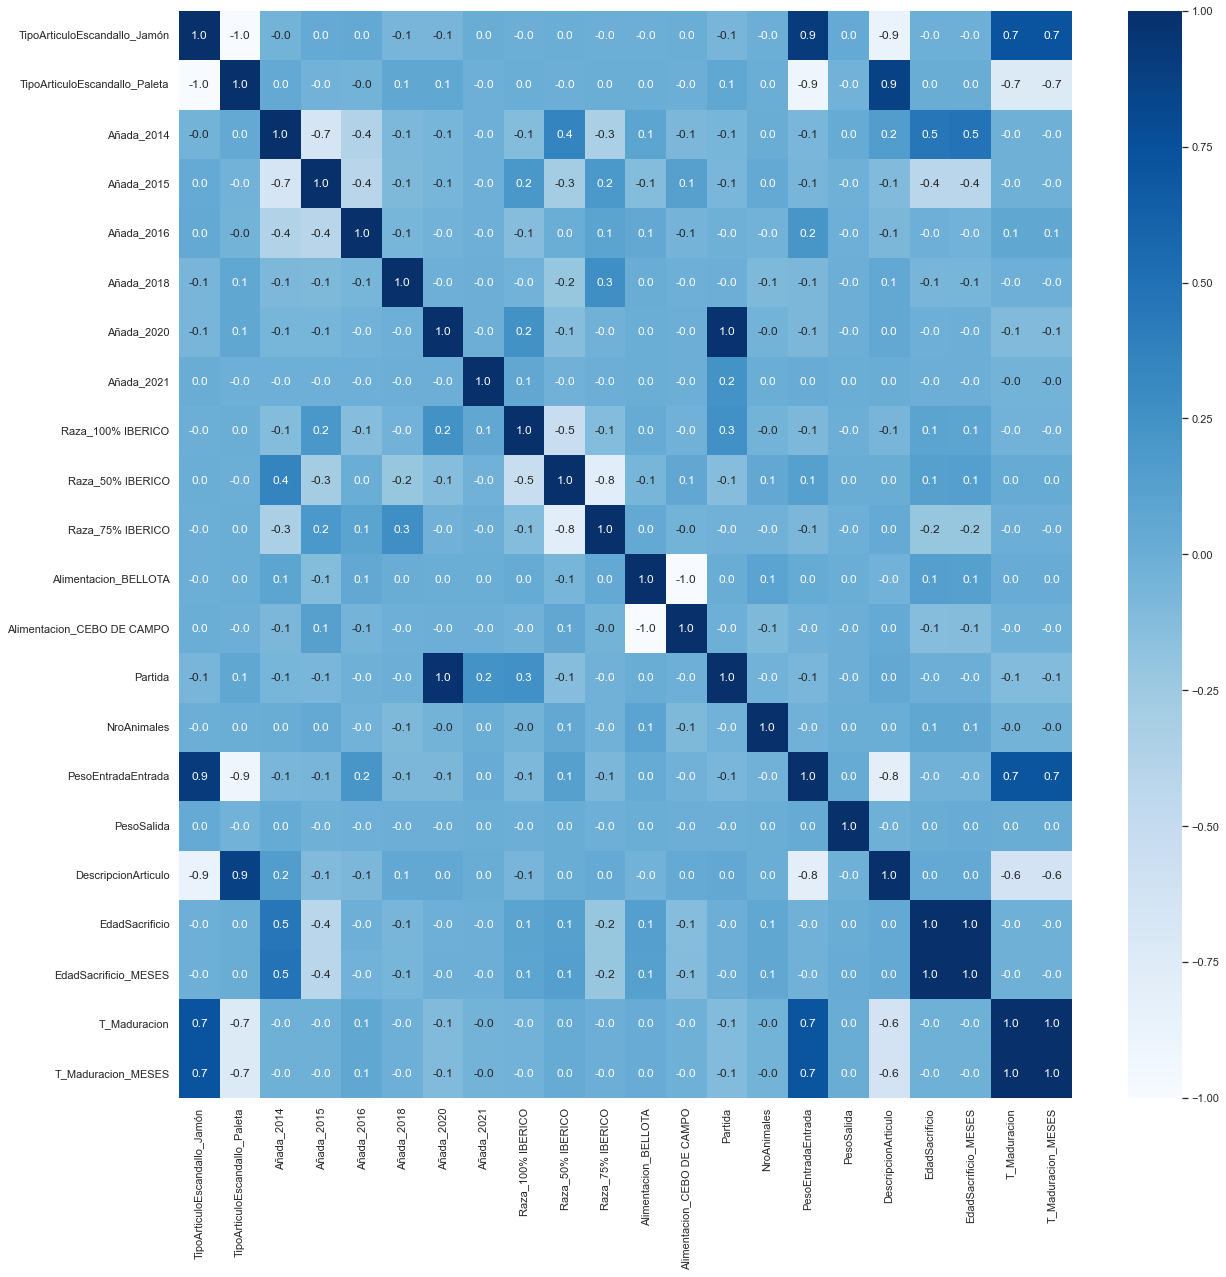

In [25]:
correlation_matrix = (datos_OneH).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')

IndexError: list index out of range

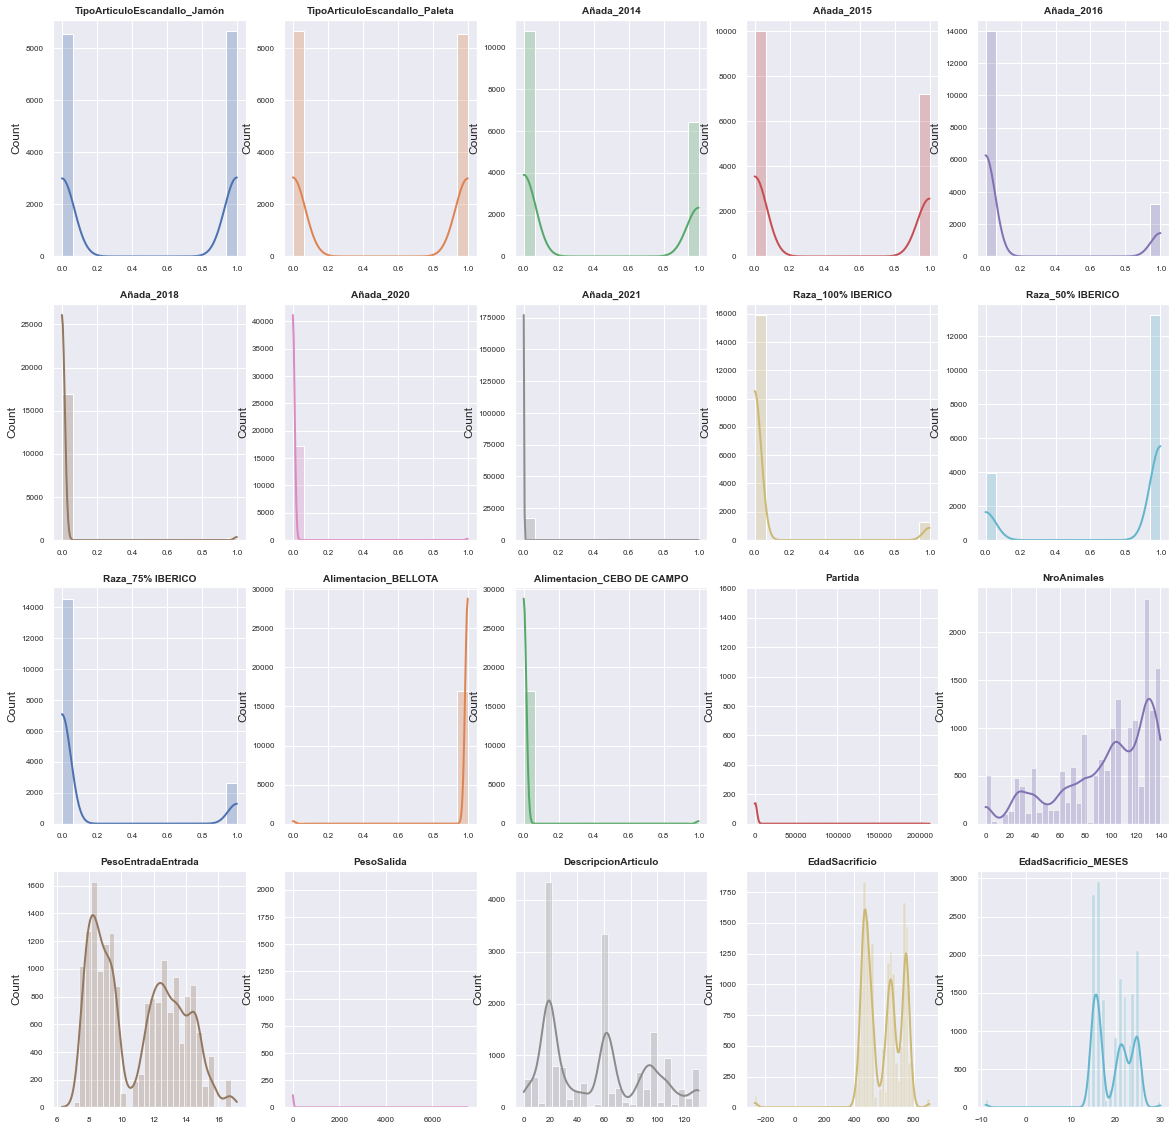

In [26]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 20))
axes = axes.flat
columnas_numeric = datos_OneH.select_dtypes(include=['uint8','float64','int64','int32']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos_OneH,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [27]:
datos_OneH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17209 entries, 1 to 19999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TipoArticuloEscandallo_Jamón   17209 non-null  uint8  
 1   TipoArticuloEscandallo_Paleta  17209 non-null  uint8  
 2   Añada_2014                     17209 non-null  uint8  
 3   Añada_2015                     17209 non-null  uint8  
 4   Añada_2016                     17209 non-null  uint8  
 5   Añada_2018                     17209 non-null  uint8  
 6   Añada_2020                     17209 non-null  uint8  
 7   Añada_2021                     17209 non-null  uint8  
 8   Raza_100% IBERICO              17209 non-null  uint8  
 9   Raza_50% IBERICO               17209 non-null  uint8  
 10  Raza_75% IBERICO               17209 non-null  uint8  
 11  Alimentacion_BELLOTA           17209 non-null  uint8  
 12  Alimentacion_CEBO DE CAMPO     17209 non-null 

# Ajuste modelo

### División de datos en train y test

In [28]:
x = datos_OneH[['TipoArticuloEscandallo_Jamón','TipoArticuloEscandallo_Paleta','Partida','PesoEntradaEntrada','DescripcionArticulo']]
y = datos_OneH['T_Maduracion_MESES']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,random_state=1234,shuffle=True)

## Logistic Regresion

In [29]:
# Entrenamos el modelo
modeloLR = LogisticRegression(max_iter=200)
modeloLR.fit(x_train,y_train)

#Predecimos sobre el dataset de test
y_pred = modeloLR.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Precision: {:.3f}'.format(accuracy*100))

Precision: 5.549


## Modelo regresión

In [30]:
x_train = sm.add_constant(x_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=x_train,)
modelo = modelo.fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:     T_Maduracion_MESES   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     4313.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        19:12:23   Log-Likelihood:                -47096.
No. Observations:               13767   AIC:                         9.420e+04
Df Residuals:                   13762   BIC:                         9.424e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         